
- general data analysis:
    - 20 most popular artists and look what kind of music they make
    - distribution of speechness, instrumentalness, ... per genre
      --> create plots

- correlation:
    - tempo and popularity / danceability
    - what makes a song danceable? key, liveness, instrumentalness


- time series:
    - how things changeover the years: instrumentalness

- text work:
    - use library to identify language of the song. Where are the most popular
      songs?
    - which words make a song more popular?

- classification:
    - predict genre

### Explanation for the data columns: https://www.kaggle.com/datasets/maharshipandya/-spotify-tracks-dataset

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import pearsonr, spearmanr, shapiro, ttest_ind, ttest_rel, norm
from ast import literal_eval
from scipy import stats

## Importing Data

In [3]:
import pandas as pd
from ast import literal_eval

url='https://drive.google.com/file/d/1qvEcBTp0YoxBaCfyvj5_vh99J6qR6HWY/view'
url='https://drive.google.com/uc?id=' + url.split('/')[-2]
song = pd.read_csv(url, converters={"artists": literal_eval})

In [4]:
song.head()

,acousticness,artists,danceability,duration_ms,energy,explicit,id,instrumentalness,key,liveness,loudness,mode,name,popularity,release_date,speechiness,tempo,valence,year
0,0.995,[Carl Woitschach],0.708,158648,0.1950,0,6KbQ3uYMLKb5jDxLF7wYDD,0.563,10,0.1510,-12.428,1,Singende Bataillone 1. Teil,0,1928,0.0506,118.469,0.7790,1928
1,0.994,"[Robert Schumann, Vladimir Horowitz]",0.379,282133,0.0135,0,6KuQTIu1KoTTkLXKrwlLPV,0.901,8,0.0763,-28.454,1,"Fantasiestücke, Op. 111: Più tosto lento",0,1928,0.0462,83.972,0.0767,1928
2,0.604,[Seweryn Goszczyński],0.749,104300,0.2200,0,6L63VW0PibdM1HDSBoqnoM,0.000,5,0.1190,-19.924,0,Chapter 1.18 - Zamek kaniowski,0,1928,0.9290,107.177,0.8800,1928
3,0.995,[Francisco Canaro],0.781,180760,0.1300,0,6M94FkXd15sOAOQYRnWPN8,0.887,1,0.1110,-14.734,0,Bebamos Juntos - Instrumental (Remasterizado),0,1928-09-25,0.0926,108.003,0.7200,1928
4,0.990,"[Frédéric Chopin, Vladimir Horowitz]",0.210,687733,0.2040,0,6N6tiFZ9vLTSOIxkj8qKrd,0.908,11,0.0980,-16.829,1,"Polonaise-Fantaisie in A-Flat Major, Op. 61",1,1928,0.0424,62.149,0.0693,1928


In [ ]:
song["first_artist"] = song.artists.str[0]
print(song.iloc[0]["artists"])
print(song.iloc[0]["first_artist"])

['Carl Woitschach']
Carl Woitschach


In [ ]:
from numba.core.types.scalars import Float
url='https://drive.google.com/file/d/1mQGLMzEuBfiTNo1vmImH1j2Iuwe6og7g/view?usp=sharing'
url='https://drive.google.com/uc?id=' + url.split('/')[-2]
gold_price = pd.read_csv(url)
gold_price.rename({'Name':'year', 'US dollar': 'price'},axis = 1, inplace = True)
gold_price.set_index('year', inplace = True)
gold_price = gold_price.price.str.replace(',','').astype('float').reset_index()
gold_price.tail()

,year,price
40,2018,1268.5
41,2019,1392.6
42,2020,1769.6
43,2021,1798.6
44,2022,1800.1


In [ ]:
# Artists seperation into single artist
def try_parse(s):
  try:
    return ast.literal_eval(s)
  except:
    return None

song['single_artists'] = song['artists'].apply(try_parse)
#song_exploded = song.explode('artists').reset_index(drop=True)# not usefull
song_exploded = song.explode('single_artists').reset_index(drop=True)
song.head()

,acousticness,artists,danceability,duration_ms,energy,explicit,id,instrumentalness,key,liveness,...,mode,name,popularity,release_date,speechiness,tempo,valence,year,first_artist,single_artists
0,0.995,[Carl Woitschach],0.708,158648,0.1950,0,6KbQ3uYMLKb5jDxLF7wYDD,0.563,10,0.1510,...,1,Singende Bataillone 1. Teil,0,1928,0.0506,118.469,0.7790,1928,Carl Woitschach,None
1,0.994,"[Robert Schumann, Vladimir Horowitz]",0.379,282133,0.0135,0,6KuQTIu1KoTTkLXKrwlLPV,0.901,8,0.0763,...,1,"Fantasiestücke, Op. 111: Più tosto lento",0,1928,0.0462,83.972,0.0767,1928,Robert Schumann,None
2,0.604,[Seweryn Goszczyński],0.749,104300,0.2200,0,6L63VW0PibdM1HDSBoqnoM,0.000,5,0.1190,...,0,Chapter 1.18 - Zamek kaniowski,0,1928,0.9290,107.177,0.8800,1928,Seweryn Goszczyński,None
3,0.995,[Francisco Canaro],0.781,180760,0.1300,0,6M94FkXd15sOAOQYRnWPN8,0.887,1,0.1110,...,0,Bebamos Juntos - Instrumental (Remasterizado),0,1928-09-25,0.0926,108.003,0.7200,1928,Francisco Canaro,None
4,0.990,"[Frédéric Chopin, Vladimir Horowitz]",0.210,687733,0.2040,0,6N6tiFZ9vLTSOIxkj8qKrd,0.908,11,0.0980,...,1,"Polonaise-Fantaisie in A-Flat Major, Op. 61",1,1928,0.0424,62.149,0.0693,1928,Frédéric Chopin,None


In [ ]:
artist_size = song.explode('artists').groupby('artists').size()
artist_size

artists
"Cats" 1981 Original London Cast                                   10
"Cats" 1983 Broadway Cast                                          21
"Fiddler On The Roof” Motion Picture Chorus                         7
"Fiddler On The Roof” Motion Picture Orchestra                     14
"Joseph And The Amazing Technicolor Dreamcoat" 1991 London Cast     5
                                                                   ..
鳳飛飛                                                                 1
黃品源                                                                 1
黃國隆                                                                 6
黃蜀娟                                                                21
黑豹                                                                  1
Length: 27622, dtype: int64

In [ ]:
pd.set_option('display.max_columns', None)
image_song = song[['acousticness', 'artists', 'danceability', 'duration_ms', 'energy',\
      'explicit', 'id', 'instrumentalness', 'key', 'liveness', 'loudness','mode'\
      , 'name', 'popularity', 'release_date', 'speechiness', 'tempo','valence', 'year']].head()

image_song

,acousticness,artists,danceability,duration_ms,energy,explicit,id,instrumentalness,key,liveness,loudness,mode,name,popularity,release_date,speechiness,tempo,valence,year
0,0.995,[Carl Woitschach],0.708,158648,0.1950,0,6KbQ3uYMLKb5jDxLF7wYDD,0.563,10,0.1510,-12.428,1,Singende Bataillone 1. Teil,0,1928,0.0506,118.469,0.7790,1928
1,0.994,"[Robert Schumann, Vladimir Horowitz]",0.379,282133,0.0135,0,6KuQTIu1KoTTkLXKrwlLPV,0.901,8,0.0763,-28.454,1,"Fantasiestücke, Op. 111: Più tosto lento",0,1928,0.0462,83.972,0.0767,1928
2,0.604,[Seweryn Goszczyński],0.749,104300,0.2200,0,6L63VW0PibdM1HDSBoqnoM,0.000,5,0.1190,-19.924,0,Chapter 1.18 - Zamek kaniowski,0,1928,0.9290,107.177,0.8800,1928
3,0.995,[Francisco Canaro],0.781,180760,0.1300,0,6M94FkXd15sOAOQYRnWPN8,0.887,1,0.1110,-14.734,0,Bebamos Juntos - Instrumental (Remasterizado),0,1928-09-25,0.0926,108.003,0.7200,1928
4,0.990,"[Frédéric Chopin, Vladimir Horowitz]",0.210,687733,0.2040,0,6N6tiFZ9vLTSOIxkj8qKrd,0.908,11,0.0980,-16.829,1,"Polonaise-Fantaisie in A-Flat Major, Op. 61",1,1928,0.0424,62.149,0.0693,1928


In [ ]:
url='https://drive.google.com/file/d/1hPKmiRJy2Gb_rwqWcrY9OwMNk-Zn7PVK/view'
url='https://drive.google.com/uc?id=' + url.split('/')[-2]
genre = pd.read_csv(url)
genre.head()

<ipython-input-8-8f651a391d91>:3: DtypeWarning: Columns (15) have mixed types. Specify dtype option on import or set low_memory=False.
  genre = pd.read_csv(url)


,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,id,duration_ms,time_signature,genre,name
0,0.831,0.814,2,-7.364,1,0.4200,0.0598,0.013400,0.0556,0.3890,156.985,2Vc6NJ9PW9gD9q343XFRKx,124539,4,Dark Trap,Mercury: Retrograde
1,0.719,0.493,8,-7.230,1,0.0794,0.4010,0.000000,0.1180,0.1240,115.080,7pgJBLVz5VmnL7uGHmRj6p,224427,4,Dark Trap,Pathology
2,0.850,0.893,5,-4.783,1,0.0623,0.0138,0.000004,0.3720,0.0391,218.050,0vSWgAlfpye0WCGeNmuNhy,98821,4,Dark Trap,Symbiote
3,0.476,0.781,0,-4.710,1,0.1030,0.0237,0.000000,0.1140,0.1750,186.948,0VSXnJqQkwuH2ei1nOQ1nu,123661,3,Dark Trap,ProductOfDrugs (Prod. The Virus and Antidote)
4,0.798,0.624,2,-7.668,1,0.2930,0.2170,0.000000,0.1660,0.5910,147.988,4jCeguq9rMTlbMmPHuO7S3,123298,4,Dark Trap,Venom


In [ ]:
# Checking the shape of our dataset
song.shape

(169909, 21)

In [ ]:
genre.shape

(42305, 16)

In [ ]:
song.describe()

,acousticness,danceability,duration_ms,energy,explicit,instrumentalness,key,liveness,loudness,mode,popularity,speechiness,tempo,valence,year
count,169909.000000,169909.000000,1.699090e+05,169909.000000,169909.000000,169909.000000,169909.000000,169909.000000,169909.000000,169909.000000,169909.000000,169909.000000,169909.000000,169909.000000,169909.000000
mean,0.493214,0.538150,2.314062e+05,0.488593,0.084863,0.161937,5.200519,0.206690,-11.370289,0.708556,31.556610,0.094058,116.948017,0.532095,1977.223231
std,0.376627,0.175346,1.213219e+05,0.267390,0.278679,0.309329,3.515257,0.176796,5.666765,0.454429,21.582614,0.149937,30.726937,0.262408,25.593168
min,0.000000,0.000000,5.108000e+03,0.000000,0.000000,0.000000,0.000000,0.000000,-60.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1921.000000
25%,0.094500,0.417000,1.710400e+05,0.263000,0.000000,0.000000,2.000000,0.098400,-14.470000,0.000000,12.000000,0.034900,93.516000,0.322000,1957.000000
50%,0.492000,0.548000,2.086000e+05,0.481000,0.000000,0.000204,5.000000,0.135000,-10.474000,1.000000,33.000000,0.045000,114.778000,0.544000,1978.000000
75%,0.888000,0.667000,2.629600e+05,0.710000,0.000000,0.086800,8.000000,0.263000,-7.118000,1.000000,48.000000,0.075400,135.712000,0.749000,1999.000000
max,0.996000,0.988000,5.403500e+06,1.000000,1.000000,1.000000,11.000000,1.000000,3.855000,1.000000,100.000000,0.969000,244.091000,1.000000,2020.000000


In [ ]:
genre.describe()

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature
count,42305.000000,42305.000000,42305.000000,42305.000000,42305.000000,42305.000000,42305.000000,42305.000000,42305.000000,42305.000000,42305.000000,42305.000000,42305.000000
mean,0.639364,0.762516,5.370240,-6.465442,0.549462,0.136561,0.096160,0.283048,0.214079,0.357101,147.474056,250865.846685,3.972580
std,0.156617,0.183823,3.666145,2.941165,0.497553,0.126168,0.170827,0.370791,0.175576,0.233200,23.844623,102957.713571,0.268342
min,0.065100,0.000243,0.000000,-33.357000,0.000000,0.022700,0.000001,0.000000,0.010700,0.018700,57.967000,25600.000000,1.000000
25%,0.524000,0.632000,1.000000,-8.161000,0.000000,0.049100,0.001730,0.000000,0.099600,0.161000,129.931000,179840.000000,4.000000
50%,0.646000,0.803000,6.000000,-6.234000,1.000000,0.075500,0.016400,0.005940,0.135000,0.322000,144.973000,224760.000000,4.000000
75%,0.766000,0.923000,9.000000,-4.513000,1.000000,0.193000,0.107000,0.722000,0.294000,0.522000,161.464000,301133.000000,4.000000
max,0.988000,1.000000,11.000000,3.148000,1.000000,0.946000,0.988000,0.989000,0.988000,0.988000,220.290000,913052.000000,5.000000


In [ ]:
song.columns

Index(['acousticness', 'artists', 'danceability', 'duration_ms', 'energy',
       'explicit', 'id', 'instrumentalness', 'key', 'liveness', 'loudness',
       'mode', 'name', 'popularity', 'release_date', 'speechiness', 'tempo',
       'valence', 'year', 'first_artist', 'single_artists'],
      dtype='object')

In [ ]:
genre.columns

Index(['danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness',
       'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo',
       'id', 'duration_ms', 'time_signature', 'genre', 'name'],
      dtype='object')

### Finding the overlap between the two dataset

In [ ]:
joined_df = pd.merge(song, genre, how = 'inner', on = 'id')

### Setting the plot size

In [ ]:
sns.set(rc={'figure.figsize':(13,8.27)})
sns.set_context(rc={"font.size":20,"axes.titlesize":20,"axes.labelsize":20})

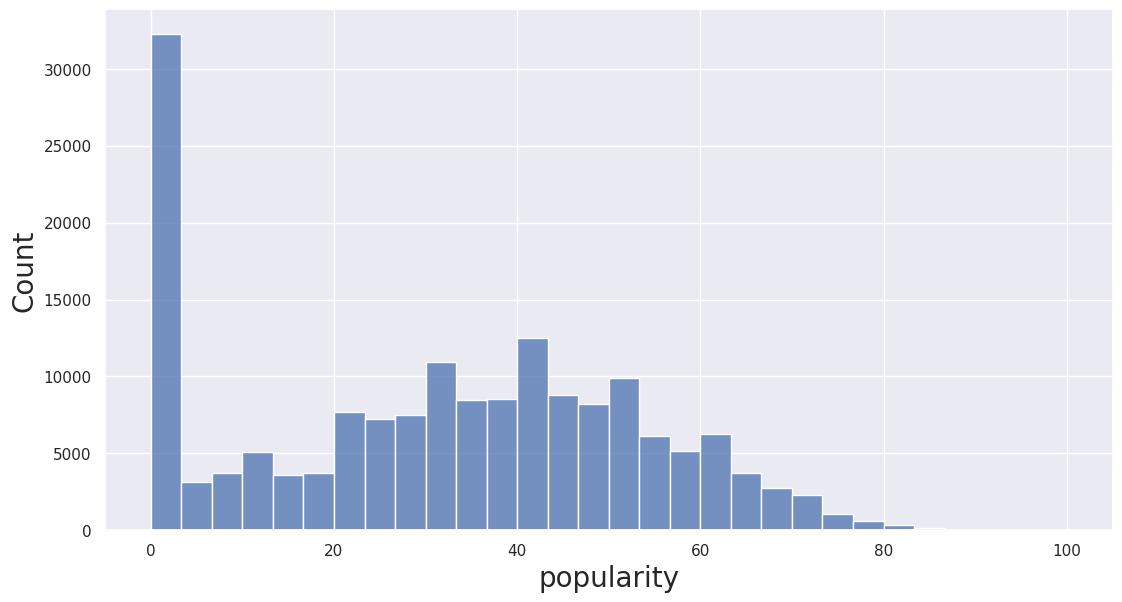

In [ ]:
# Checking the popularity distribution
sns.histplot(data = song, x = 'popularity', bins = 30)
plt.subplots_adjust(bottom=0.25)
#plt.savefig('histo_popularity2.png')

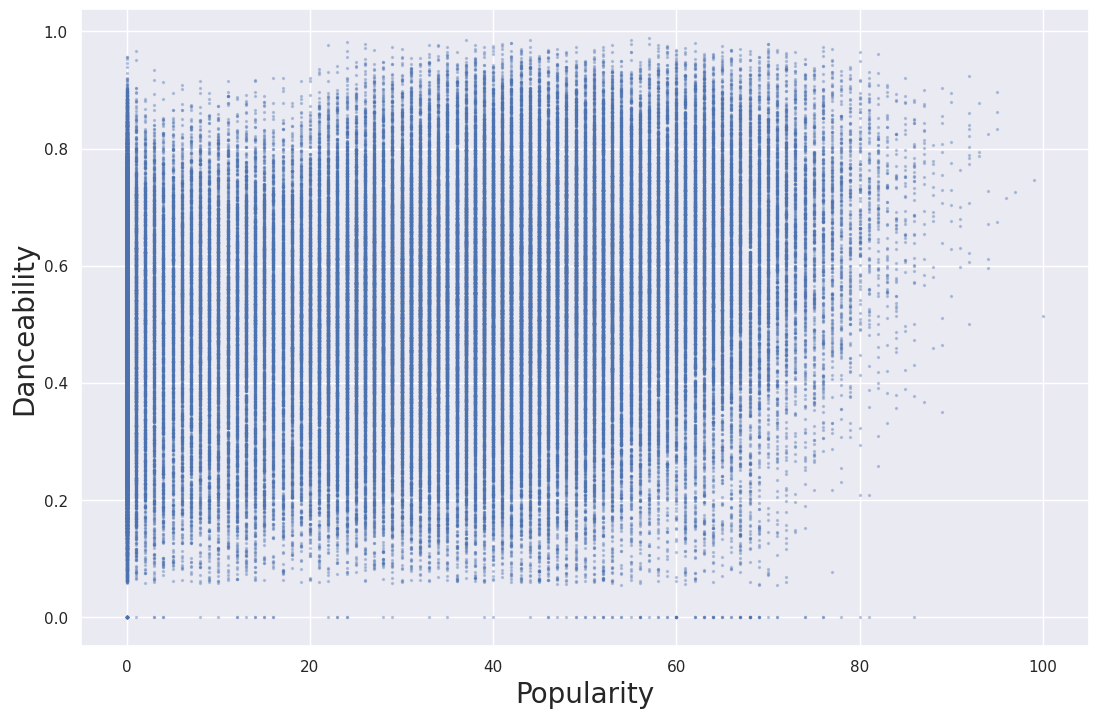

In [ ]:
plt.scatter(song.popularity, song.danceability, s=2, alpha=0.3)
plt.xlabel('Popularity')
plt.ylabel('Danceability')
#plt.set_facecolor('yellow')
plt.show()
#plt.savefig('popularity_dance_corr')

## 50 most popular single artists

In [ ]:
import pandas as pd
from ast import literal_eval

url='https://drive.google.com/file/d/1qvEcBTp0YoxBaCfyvj5_vh99J6qR6HWY/view'
url='https://drive.google.com/uc?id=' + url.split('/')[-2]
song1 = pd.read_csv(url)

In [ ]:
# 50 most popular artists and look what kind of music they make

popular_artists = song1.groupby('artists').agg({'popularity':"mean"}).sort_values('popularity', ascending = False).head(50)
popular_artists

,popularity
artists,
"['Powfu', 'beabadoobee']",97.0
"['BENEE', 'Gus Dapperton']",95.0
"['Surf Mesa', 'Emilee']",95.0
['StaySolidRocky'],94.0
"['Ariana Grande', 'Justin Bieber']",94.0
"['Topic', 'A7S']",92.0
"['Bad Bunny', 'Jowell & Randy', 'Nengo Flow']",92.0
"['KAROL G', 'Nicki Minaj']",92.0
"['Marshmello', 'Halsey']",91.0


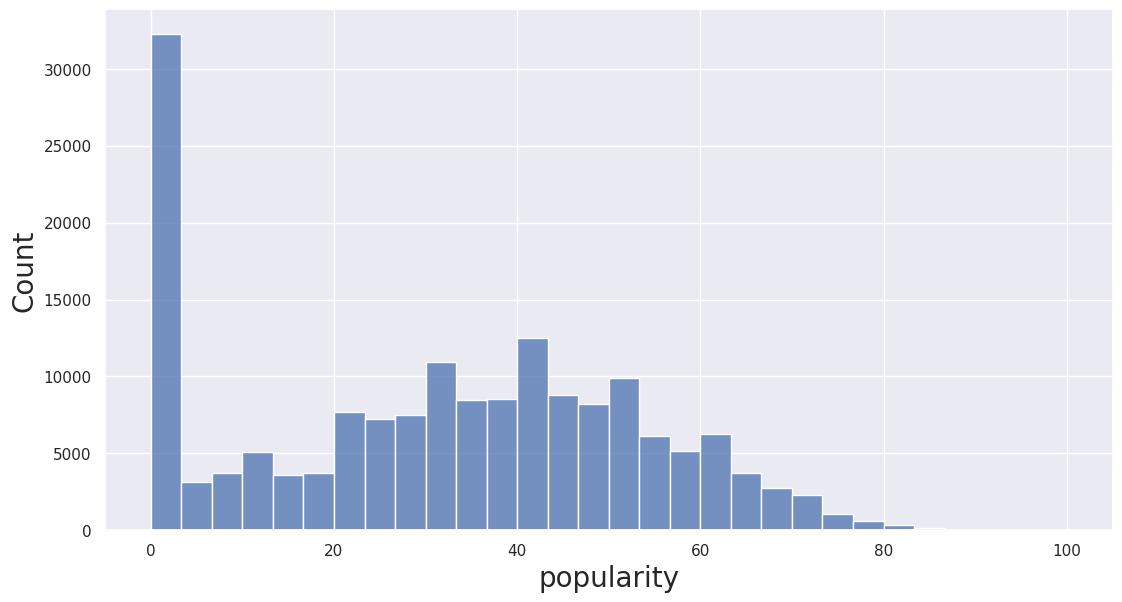

In [ ]:
# Checking the popularity distribution
sns.histplot(data = song, x = 'popularity', bins = 30)
plt.subplots_adjust(bottom=0.25)
plt.savefig('histo_popularity2.png')

### why is it 0?

In [ ]:
song.release_date

0               1928
1               1928
2               1928
3         1928-09-25
4               1928
             ...    
169904    2020-05-15
169905    2020-06-08
169906    2020-05-29
169907    2020-02-28
169908    2020-03-27
Name: release_date, Length: 169909, dtype: object

In [ ]:
mask = song['popularity'] == 0
no_popularity = song[mask]
no_popularity # songs in 2020 were probably just posted

,acousticness,artists,danceability,duration_ms,energy,explicit,id,instrumentalness,key,liveness,loudness,mode,name,popularity,release_date,speechiness,tempo,valence,year,first_artist,single_artists
0,0.995,[Carl Woitschach],0.708,158648,0.1950,0,6KbQ3uYMLKb5jDxLF7wYDD,0.563000,10,0.1510,-12.428,1,Singende Bataillone 1. Teil,0,1928,0.0506,118.469,0.7790,1928,Carl Woitschach,None
1,0.994,"[Robert Schumann, Vladimir Horowitz]",0.379,282133,0.0135,0,6KuQTIu1KoTTkLXKrwlLPV,0.901000,8,0.0763,-28.454,1,"Fantasiestücke, Op. 111: Più tosto lento",0,1928,0.0462,83.972,0.0767,1928,Robert Schumann,None
2,0.604,[Seweryn Goszczyński],0.749,104300,0.2200,0,6L63VW0PibdM1HDSBoqnoM,0.000000,5,0.1190,-19.924,0,Chapter 1.18 - Zamek kaniowski,0,1928,0.9290,107.177,0.8800,1928,Seweryn Goszczyński,None
3,0.995,[Francisco Canaro],0.781,180760,0.1300,0,6M94FkXd15sOAOQYRnWPN8,0.887000,1,0.1110,-14.734,0,Bebamos Juntos - Instrumental (Remasterizado),0,1928-09-25,0.0926,108.003,0.7200,1928,Francisco Canaro,None
5,0.995,"[Felix Mendelssohn, Vladimir Horowitz]",0.424,352600,0.1200,0,6NxAf7M8DNHOBTmEd3JSO5,0.911000,6,0.0915,-19.242,0,Scherzo a capriccio: Presto,0,1928,0.0593,63.521,0.2660,1928,Felix Mendelssohn,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
169822,0.217,[Don Omar],0.741,255680,0.7870,0,415Qh0jfE8ElFg7JaJ4MfF,0.017900,5,0.0835,-6.228,1,Pobre Diabla,0,2020-06-05,0.0525,91.993,0.7710,2020,Don Omar,None
169825,0.913,[ROSALÍA],0.698,253109,0.2900,0,2H60EiDMGTnzer2D8I6DMv,0.000021,4,0.0950,-6.899,0,Aunque Es De Noche,0,2020-06-05,0.0510,137.949,0.3980,2020,ROSALÍA,None
169826,0.921,[ROSALÍA],0.442,214012,0.2670,0,76WMWYa1iqRTHZotPuuEuc,0.000017,6,0.1210,-9.640,0,Catalina,0,2020-06-05,0.0582,78.171,0.3220,2020,ROSALÍA,None
169849,0.262,[Ellie Goulding],0.453,148689,0.3160,0,3AMQUcKmht3G7PhvTJYuZ4,0.000894,0,0.1350,-8.525,1,How Long Will I Love You,0,2020-06-05,0.0316,125.628,0.1770,2020,Ellie Goulding,None


In [ ]:
no_popularity.groupby(['year']).sum('popularity')

,acousticness,danceability,duration_ms,energy,explicit,instrumentalness,key,liveness,loudness,mode,popularity,speechiness,tempo,valence
year,,,,,,,,,,,,,,
1921,93.753400,47.0143,22361510,26.327300,7,31.128604,537,23.2820,-1786.374,67,0,8.5078,10835.777,49.031100
1922,66.951000,33.9150,11962224,16.620890,0,30.969836,377,17.0316,-1367.619,44,0,7.8592,7194.231,38.325000
1923,67.263000,32.7910,11286081,19.727700,0,37.220257,323,18.4921,-1142.748,44,0,7.9801,7309.443,43.617100
1924,179.668167,101.3300,36353038,66.276300,0,123.148478,1042,45.6102,-2835.083,143,0,18.0985,23122.084,124.614000
1925,134.219000,73.9820,24641298,33.427500,0,69.303826,739,31.7332,-2251.463,90,0,16.7643,14650.428,80.261200
1926,469.917725,366.3160,112745603,157.767870,219,332.349035,3365,169.9932,-11714.481,459,0,249.9860,73127.947,304.168510
1927,483.624368,344.2950,96157445,127.325500,12,215.568345,2805,87.0493,-7905.449,333,0,64.4180,59299.429,346.640100
1928,910.179411,522.8410,203682552,201.506340,0,494.904598,5227,165.2465,-16901.962,667,0,146.3172,102515.632,495.342800
1929,502.687110,569.3777,146831270,208.056900,427,191.771504,4798,207.3289,-14765.321,618,0,444.7114,97605.649,561.994900


In [ ]:
song[(song['popularity'] == 0) &  (song['year'] == 2020)]

,acousticness,artists,danceability,duration_ms,energy,explicit,id,instrumentalness,key,liveness,loudness,mode,name,popularity,release_date,speechiness,tempo,valence,year,first_artist,single_artists
8077,0.0106,[Tame Impala],0.622,218200,0.784,1,3Naa5mKj5pbrNGyHsE04zo,0.008900,1,0.1040,-3.830,0,The Less I Know The Better,0,2020-06-12,0.0292,116.892,0.780,2020,Tame Impala,None
8092,0.0608,[Morat],0.582,240240,0.921,0,3YV7XXT0lAlY4wACbw3HDZ,0.000000,4,0.1370,-3.928,1,Cómo Te Atreves,0,2020-06-12,0.0457,131.004,0.686,2020,Morat,None
8093,0.1260,"[Morat, Juanes]",0.683,231440,0.970,0,4AUgtXs2HmOXrw0ROxQM8l,0.000000,2,0.1050,-3.589,1,Besos En Guerra,0,2020-06-05,0.0489,143.931,0.769,2020,Morat,None
8108,0.5580,[Summer Walker],0.653,140760,0.418,1,2ohzw5onoEVNwKqxFS0FYP,0.000310,6,0.5620,-10.065,0,Girls Need Love,0,2020-06-16,0.2880,96.942,0.122,2020,Summer Walker,None
16174,0.0219,"[Usher, Tyga]",0.804,175179,0.852,0,0TLnTwqXslKsovat4bz0jp,0.000013,3,0.2820,-4.079,0,California (from Songland) (feat. Tyga),0,2020-06-16,0.0575,120.906,0.752,2020,Usher,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
169822,0.2170,[Don Omar],0.741,255680,0.787,0,415Qh0jfE8ElFg7JaJ4MfF,0.017900,5,0.0835,-6.228,1,Pobre Diabla,0,2020-06-05,0.0525,91.993,0.771,2020,Don Omar,None
169825,0.9130,[ROSALÍA],0.698,253109,0.290,0,2H60EiDMGTnzer2D8I6DMv,0.000021,4,0.0950,-6.899,0,Aunque Es De Noche,0,2020-06-05,0.0510,137.949,0.398,2020,ROSALÍA,None
169826,0.9210,[ROSALÍA],0.442,214012,0.267,0,76WMWYa1iqRTHZotPuuEuc,0.000017,6,0.1210,-9.640,0,Catalina,0,2020-06-05,0.0582,78.171,0.322,2020,ROSALÍA,None
169849,0.2620,[Ellie Goulding],0.453,148689,0.316,0,3AMQUcKmht3G7PhvTJYuZ4,0.000894,0,0.1350,-8.525,1,How Long Will I Love You,0,2020-06-05,0.0316,125.628,0.177,2020,Ellie Goulding,None


Results:

*   Almost all the songs with 0 popularity are between 1921 and 1955,
*   Or they were recently launched (around June 2020).
--------

<Axes: xlabel='year', ylabel='duration_ms'>

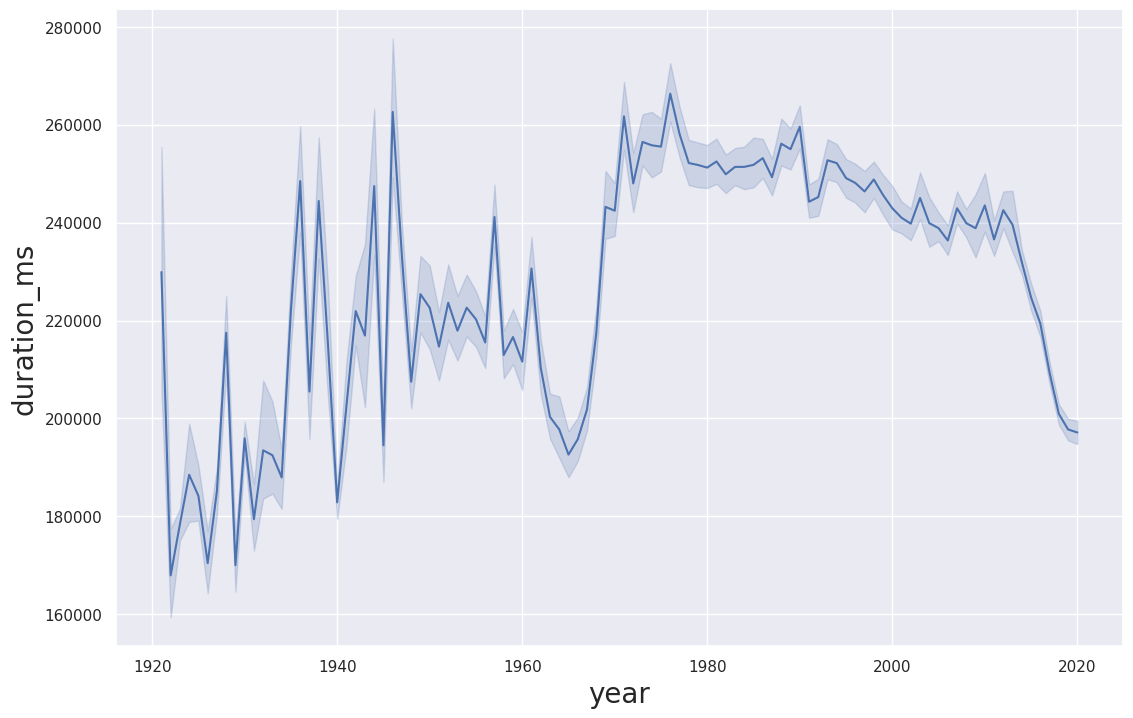

In [ ]:
sns.lineplot(data=song, x="year", y="duration_ms")

## Danceability time series:

<Axes: xlabel='year', ylabel='danceability'>

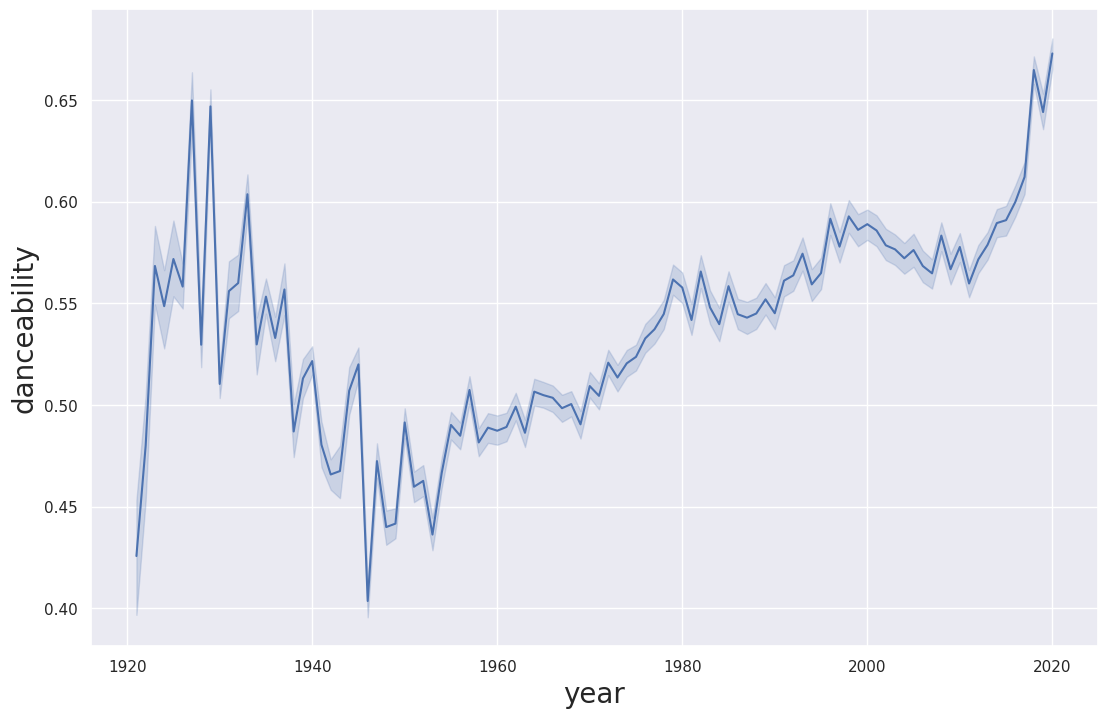

In [ ]:
sns.lineplot(data=song, x="year", y="danceability")

## Is there a negative correlation between acousticness and danceability?

In [ ]:
corr_coeficient, pvalue = pearsonr(song.acousticness, song.danceability)

print(corr_coeficient,pvalue)

-0.2659502509484082 0.0


<Axes: xlabel='danceability', ylabel='Count'>

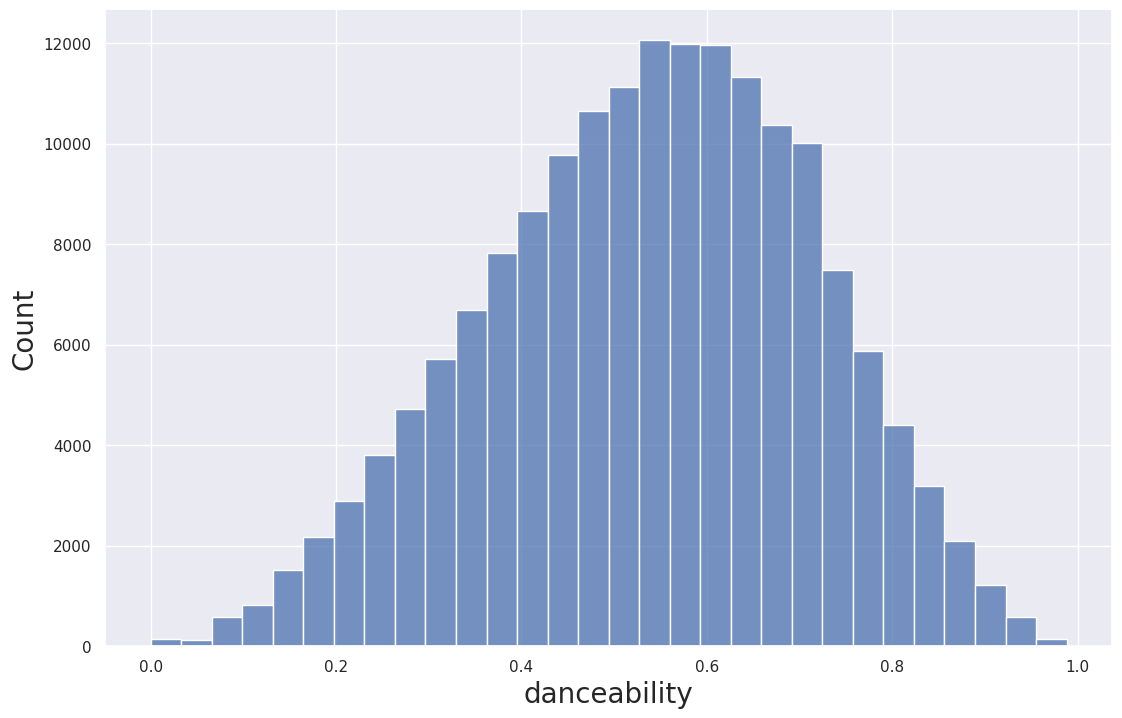

In [ ]:
sns.histplot(data = song, x = 'danceability', bins = 30)

In [ ]:
sns.histplot(data = popular_artists, x = 'danceability', bins = 5)

ValueError: ignored

Results:

*   The most popular artists make songs that are more danceable
*   Are most danceable songs also the most popular artists?

In [ ]:
most_danceable_songs = song.sort_values('danceability', ascending=False).head(500).explode('artists')
most_danceable_songs

In [ ]:
pd.merge(popular_artists, most_danceable_songs, how='inner', on='artists')


### Valence time series:

In [ ]:
sns.lineplot(data=song, x="year", y="valence")

In [ ]:
sns.histplot(data = song, x = 'valence', bins = 100)

In [ ]:
sns.histplot(data = popular_artists, x = 'valence', bins = 5)

Results:


*   Most popular artists make songs that are in a positive mood compared to less popular artists
---


In [ ]:
corr_coeficient, pvalue = pearsonr(popular_artists.loudness, popular_artists.danceability)

print(corr_coeficient,pvalue)

In [ ]:
plt.scatter(popular_artists.loudness, popular_artists.danceability)


AttributeError: ignored

In [ ]:
corr_coeficient, pvalue = pearsonr(popular_artists.valence, popular_artists.loudness)
print(corr_coeficient, pvalue)

In [ ]:
plt.scatter(popular_artists.valence, popular_artists.danceability)


AttributeError: ignored

In [ ]:
corr_coeficient, pvalue = pearsonr(popular_artists.valence, popular_artists.danceability)
print(corr_coeficient, pvalue)

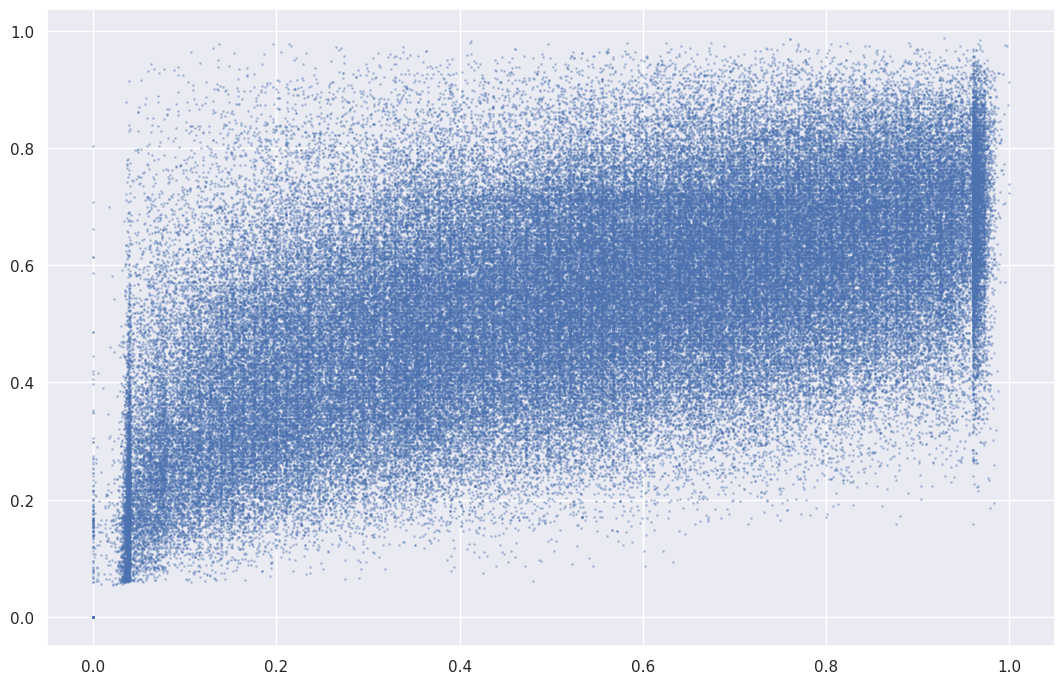

<Figure size 1300x827 with 0 Axes>

In [ ]:
plt.scatter(song.valence, song.danceability, s=1, alpha=0.3)
plt.show()
plt.savefig('valence_dance_corr')

In [ ]:
corr_coefficient, pvalue = pearsonr(song.valence, song.danceability)
print(corr_coefficient, pvalue)

0.56024218182004 0.0


Results:


*   Regarding the pvalue = 0.13, the null hypothesis that there is a correlation between the loudness and danceability is not confirmed.
*   The pvalue for the correlation between loudness and valence is 0.037. Therefore we can consider the possibility of an existing positive correlation.
*   The pvalue for the correlation between danceability and valence shows that the positive correlation is possible.




<Axes: xlabel='year', ylabel='valence'>

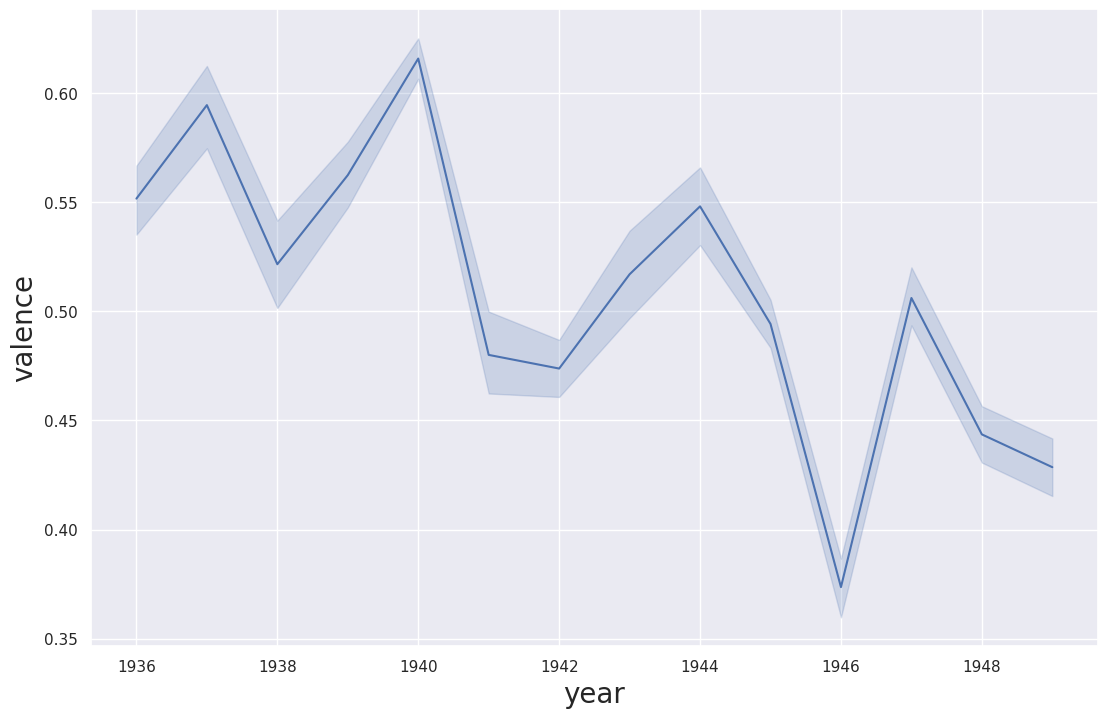

In [ ]:
song_mask1 = song[(song['year'] > 1935) & (song['year'] < 1950)]
sns.lineplot(data=song_mask1, x="year", y="valence")

<Axes: xlabel='year', ylabel='valence'>

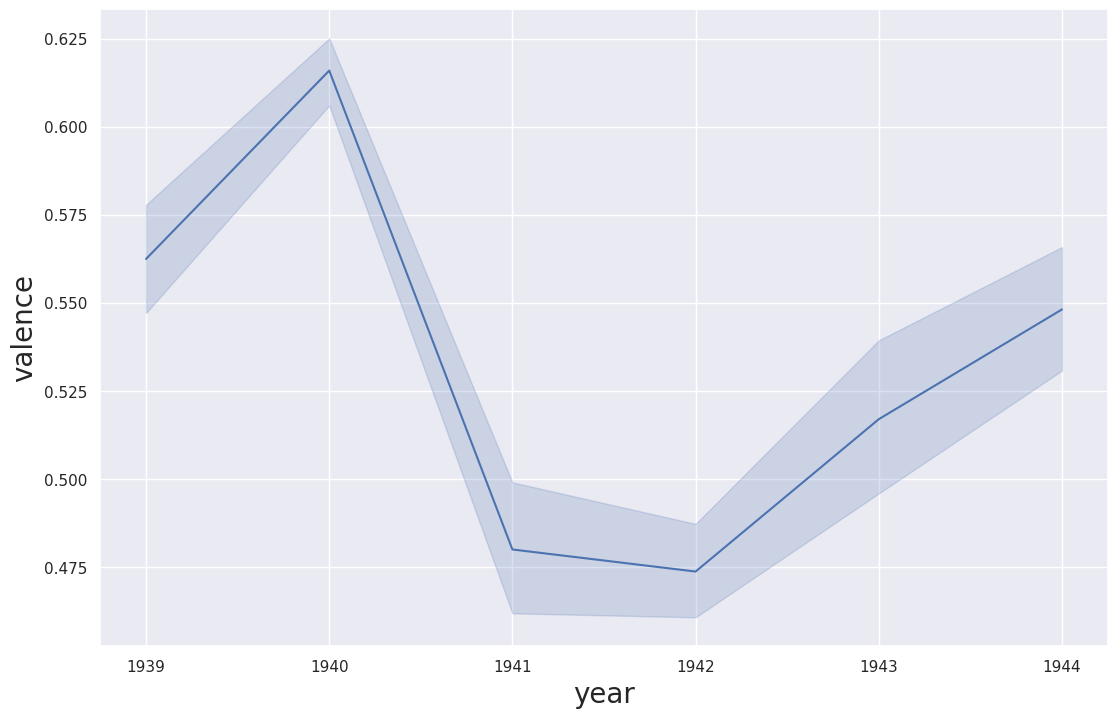

In [ ]:
# what happens during the second world war time 1938 - 1945 ?

mask = (song['year'] > 1938) & (song['year'] < 1945)
sns.lineplot(data=song[mask], x="year", y="valence") # during WW2 music is less happy

<Axes: xlabel='year', ylabel='valence'>

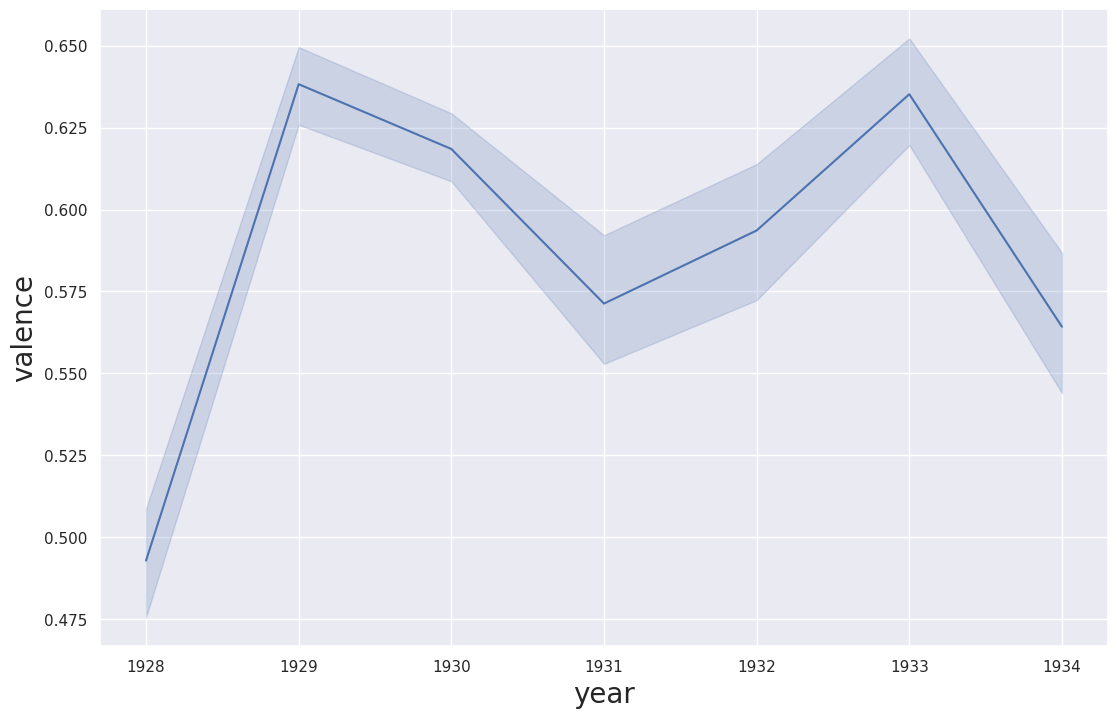

In [ ]:
mask_29crisis = (song['year'] > 1927) & (song['year'] < 1935)
sns.lineplot(data=song[mask_29crisis], x="year", y="valence")

<Axes: xlabel='year', ylabel='valence'>

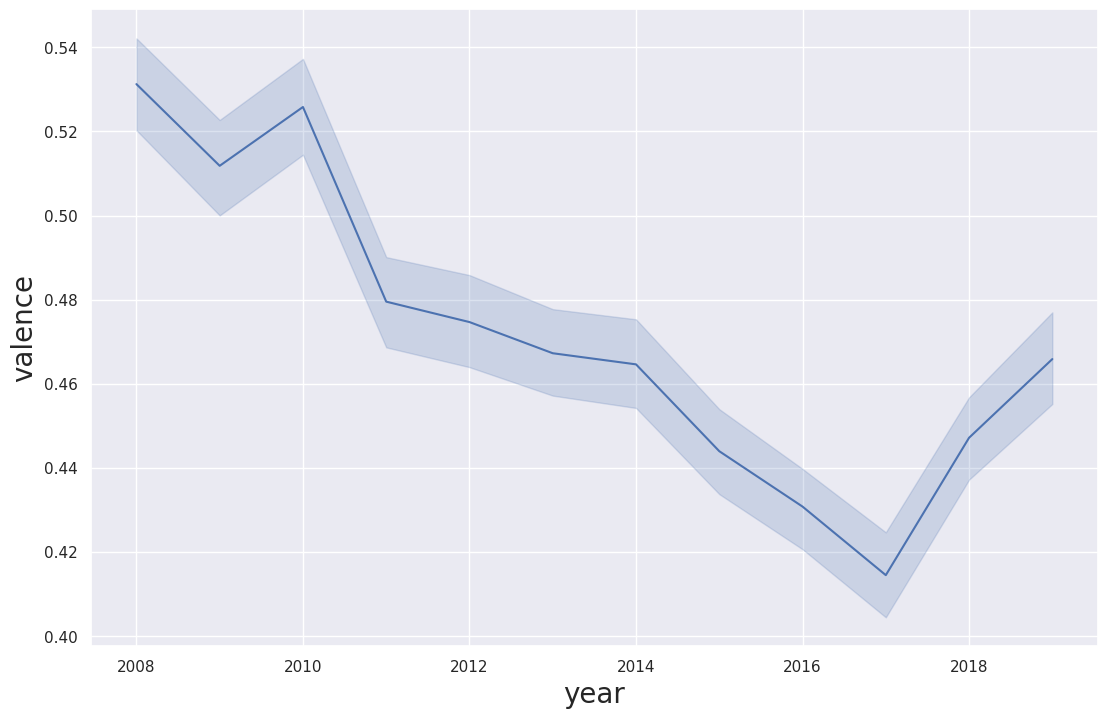

In [ ]:
mask_2008crisis = (song['year'] > 2007) & (song['year'] < 2020)
sns.lineplot(data=song[mask_2008crisis], x="year", y="valence")

In [ ]:
sns.histplot(data=song, x='year')

In [ ]:
## dividing the songs based on time and check the acousticness in decades
#DataFrame.quantile(q=0.5, axis=0, numeric_only=False, interpolation='linear', method='single')[source]
song['Decade'] = pd.cut(song.year, [1921,1930,1940,1950,1960,1970,1980, 1990, 2000, 2010, 2020])
song['Quantile_popularity'] = pd.cut(song[song.popularity != 0].popularity, [0,50,100])
sns.set(rc={'figure.figsize':(13,8.27)})
sns.set_context("paper", rc={"font.size":5,"axes.titlesize":5,"axes.labelsize":10})

decade_acou = sns.barplot(x='Decade', y='acousticness', hue='Quantile_popularity', data = song)

  According to the visualisation several hypothesis could be deferred:

---


*   the lowest popular songs belong to years **1920 to 1970** as well as a good number in the **last decade**. The reason behind this could be the method of measurement for popularity -based on recency of the song's playing and the frequency of the song being played.


*   in the first two decades the acousticness of popular songs is higher while in later decades it goes the opposite




In [ ]:
decade_acou = sns.barplot(x='Decade', y='valence', data = song)

In [ ]:
sns.lineplot(x='year', y = 'acousticness', data= song)

In [ ]:
# Acousticness distribution
sns.histplot(data = song.acousticness )

In [ ]:
# Speechiness distribution
sns.histplot(data= song.speechiness, bins = 35)
plt.yscale('log')

In [ ]:
sns.scatterplot(data = song.sample(n = 200), x = song.acousticness, y = song.speechiness)

In [ ]:
corr_coeficient, pvalue = spearmanr(song.acousticness, song.speechiness)
print(corr_coeficient, pvalue)

According to the scatter plot and correlation coefficient, there is no strong correlation found between acousticness and speechiness .

In [ ]:
#sns.lineplot(x = 'year', y = ['acousticness', 'speechiness'], data = song)

In [ ]:
#further>>
#  look into acousticness and instrumentalness correlation
#

In [ ]:
song_sample = song.sample(n = 2000)
sns.scatterplot(data = song_sample, x = song_sample.acousticness, y = song_sample.instrumentalness)

## Analysing the name of the tracks

In [ ]:
#removal function
def multi_replace(text):
  my_char_list = [')','(','"','-']
  for char in my_char_list:
    text = text.replace(char,'')
  return text.lower()

In [ ]:
## most commonly used words in 5000 most popular songs
popular_5ksongs = song.groupby('name')[['popularity', 'year']].mean().reset_index().sort_values('popularity', ascending=False).head(5000)
popular_5ksongs['words'] = popular_5ksongs['name'].astype('string').apply(multi_replace).str.split(' ')
popular_5ksongs = popular_5ksongs.explode('words').reset_index(drop=True)
#popular_5ksongs.year = popular_5ksongs.year.astype(int)
#####      df_new = popular_5ksongs[['words','year']].groupby('year').words.apply(str.join).reset_index()
popular_5ksongs.groupby('year', as_index=False).agg({'words': ' '.join})

In [ ]:
# putting all the song names from a decade in one string

popular_5ksongs.words.apply(word_tolist).reset_index()
df_new = popular_5ksongs[['words','year']].groupby('year').words.apply(lambda x: sum(x, [])).reset_index()
popular_5ksongs.words

In [ ]:
#trying with pivot table
decade = pd.cut(song.year, [1921,1930,1940,1950,1960,1970,1980, 1990, 2000, 2010, 2020])
popular_5ksongs.pivot_table(popular_5ksongs, index=decade, columns='words', aggfunc='count')

## gold and valence correlation

<Axes: xlabel='year', ylabel='valence'>

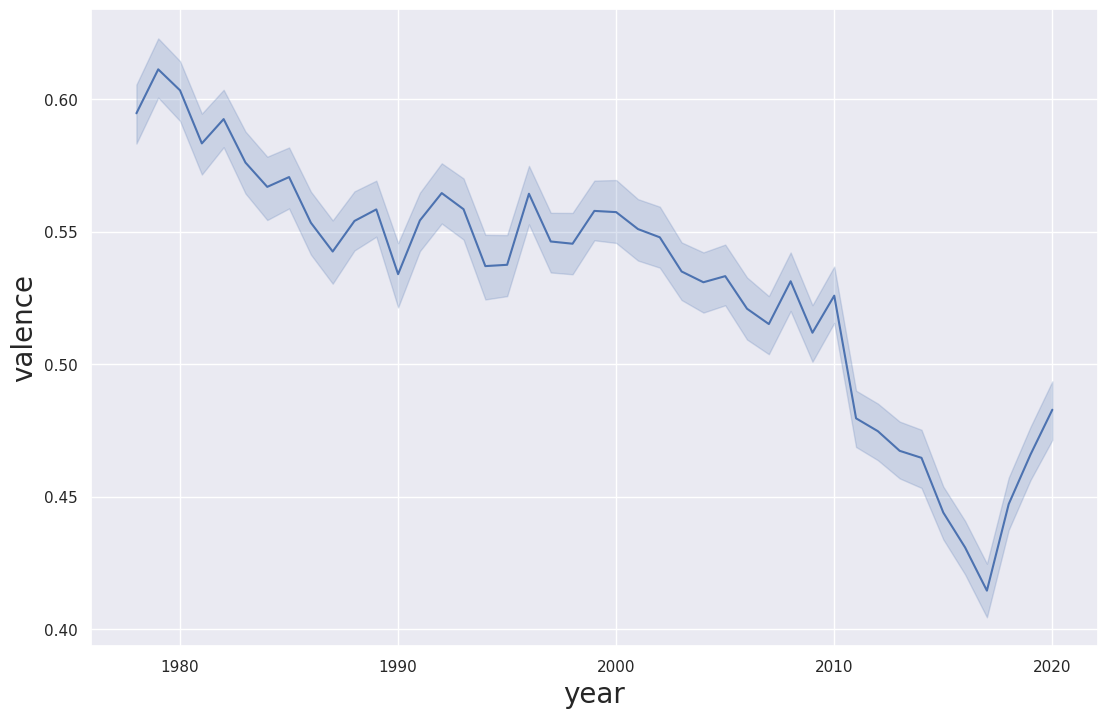

In [ ]:
sns.lineplot(data = song[song.year > 1977], x = 'year', y = 'valence')

<Axes: xlabel='year', ylabel='price'>

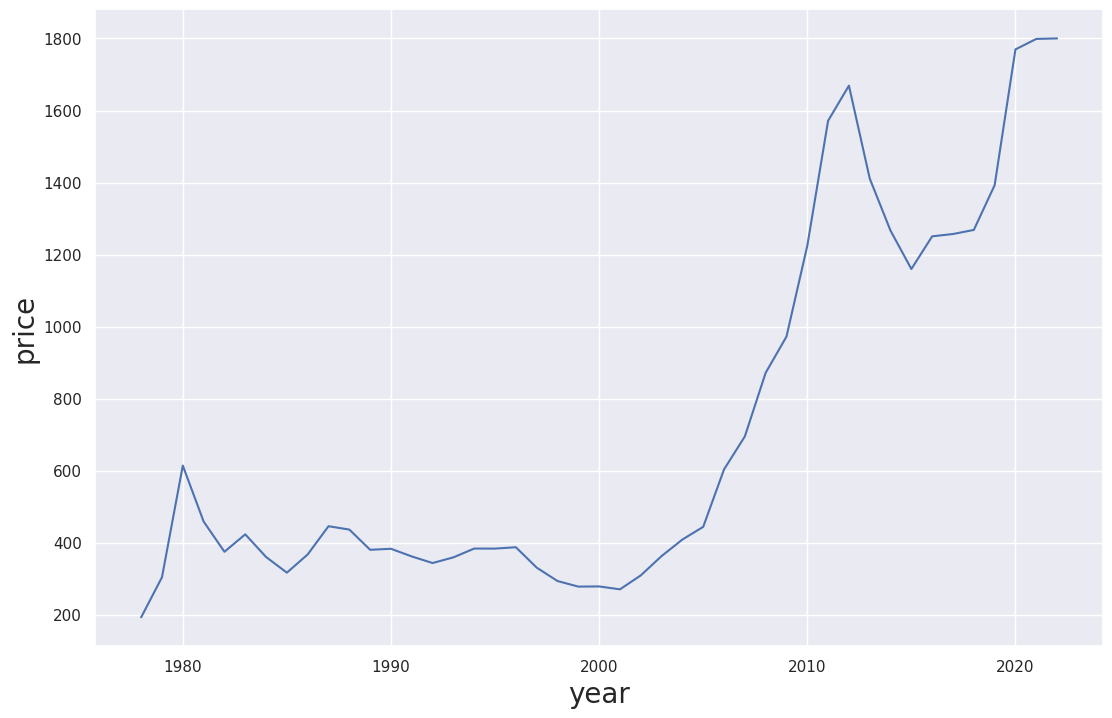

In [ ]:
sns.lineplot(data = gold_price, x = 'year', y = 'price')

In [ ]:
valence = song.groupby('year').valence.mean().reset_index().set_index('year')
valence_gold = pd.merge(valence, gold_price, how = 'inner', on = 'year')
valence_gold.head()

,year,valence,price
0,1978,0.594658,193.4
1,1979,0.611248,304.7
2,1980,0.603315,614.5
3,1981,0.583292,459.3
4,1982,0.592468,375.3


<Axes: xlabel='price', ylabel='valence'>

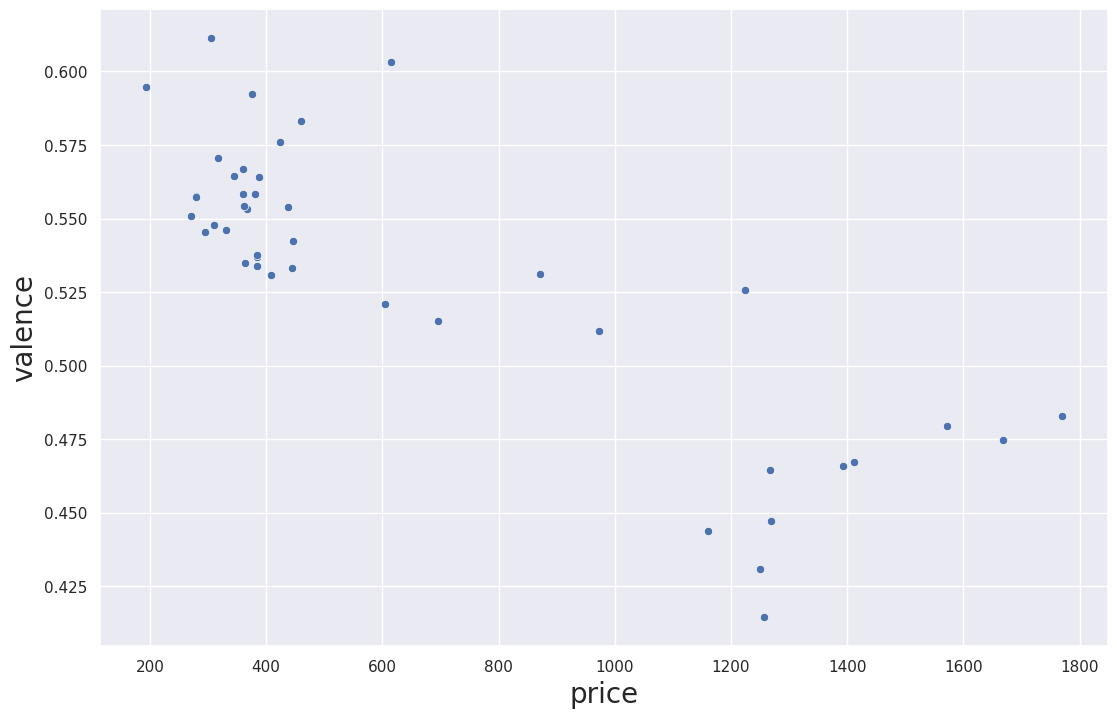

In [ ]:
sns.scatterplot(data = valence_gold, y = 'valence', x= 'price')


In [ ]:
corr_coeficient, pvalue = pearsonr(valence_gold.valence, valence_gold.price)
print(corr_coeficient, pvalue)
if pvalue < 0.01:
  print('The pvalue shows that the hypothesis that there is a correlation between gold price and song happiness is possible')

-0.8219394861607973 1.4155162130833193e-11
The pvalue shows that the hypothesis that there is a correlation between gold price and song happiness is possible


**20 most popular artists and look what kind of music they make:**

**Distribution of genre:**

In [ ]:
joined_df.genre.value_counts(normalize=True).plot.bar()

**Distribution of speechiness, where genre is 'Underground Rap':**

In [ ]:
sns.histplot(genre[genre['genre']=='Hiphop']['speechiness'])

In [ ]:
pip install langdetect

In [ ]:
from langdetect import detect
def detect_my(text):
   try:
       return detect(text)
   except:
       return 'unknown'
song50 = song.tail(50)
song50['langue'] = song50['name'].apply(detect_my)


In [ ]:
song50[['langue', 'name']]

## Classification

In [6]:
import pandas as pd
from ast import literal_eval

url='https://drive.google.com/file/d/1qvEcBTp0YoxBaCfyvj5_vh99J6qR6HWY/view'
url='https://drive.google.com/uc?id=' + url.split('/')[-2]
song = pd.read_csv(url, converters={"artists": literal_eval})
song.head()

,acousticness,artists,danceability,duration_ms,energy,explicit,id,instrumentalness,key,liveness,loudness,mode,name,popularity,release_date,speechiness,tempo,valence,year
0,0.995,[Carl Woitschach],0.708,158648,0.1950,0,6KbQ3uYMLKb5jDxLF7wYDD,0.563,10,0.1510,-12.428,1,Singende Bataillone 1. Teil,0,1928,0.0506,118.469,0.7790,1928
1,0.994,"[Robert Schumann, Vladimir Horowitz]",0.379,282133,0.0135,0,6KuQTIu1KoTTkLXKrwlLPV,0.901,8,0.0763,-28.454,1,"Fantasiestücke, Op. 111: Più tosto lento",0,1928,0.0462,83.972,0.0767,1928
2,0.604,[Seweryn Goszczyński],0.749,104300,0.2200,0,6L63VW0PibdM1HDSBoqnoM,0.000,5,0.1190,-19.924,0,Chapter 1.18 - Zamek kaniowski,0,1928,0.9290,107.177,0.8800,1928
3,0.995,[Francisco Canaro],0.781,180760,0.1300,0,6M94FkXd15sOAOQYRnWPN8,0.887,1,0.1110,-14.734,0,Bebamos Juntos - Instrumental (Remasterizado),0,1928-09-25,0.0926,108.003,0.7200,1928
4,0.990,"[Frédéric Chopin, Vladimir Horowitz]",0.210,687733,0.2040,0,6N6tiFZ9vLTSOIxkj8qKrd,0.908,11,0.0980,-16.829,1,"Polonaise-Fantaisie in A-Flat Major, Op. 61",1,1928,0.0424,62.149,0.0693,1928


In [7]:
url='https://drive.google.com/file/d/1hPKmiRJy2Gb_rwqWcrY9OwMNk-Zn7PVK/view'
url='https://drive.google.com/uc?id=' + url.split('/')[-2]
genre = pd.read_csv(url)
genre.head()

C:\Users\Golam Kausar\AppData\Local\Temp\ipykernel_9468\464401972.py:3: DtypeWarning: Columns (15) have mixed types. Specify dtype option on import or set low_memory=False.
  genre = pd.read_csv(url)


,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,id,duration_ms,time_signature,genre,name
0,0.831,0.814,2,-7.364,1,0.4200,0.0598,0.013400,0.0556,0.3890,156.985,2Vc6NJ9PW9gD9q343XFRKx,124539,4,Dark Trap,Mercury: Retrograde
1,0.719,0.493,8,-7.230,1,0.0794,0.4010,0.000000,0.1180,0.1240,115.080,7pgJBLVz5VmnL7uGHmRj6p,224427,4,Dark Trap,Pathology
2,0.850,0.893,5,-4.783,1,0.0623,0.0138,0.000004,0.3720,0.0391,218.050,0vSWgAlfpye0WCGeNmuNhy,98821,4,Dark Trap,Symbiote
3,0.476,0.781,0,-4.710,1,0.1030,0.0237,0.000000,0.1140,0.1750,186.948,0VSXnJqQkwuH2ei1nOQ1nu,123661,3,Dark Trap,ProductOfDrugs (Prod. The Virus and Antidote)
4,0.798,0.624,2,-7.668,1,0.2930,0.2170,0.000000,0.1660,0.5910,147.988,4jCeguq9rMTlbMmPHuO7S3,123298,4,Dark Trap,Venom


## Define features and labels

In [8]:
[x for  x in genre.columns if x in song.columns]

['danceability',
 'energy',
 'key',
 'loudness',
 'mode',
 'speechiness',
 'acousticness',
 'instrumentalness',
 'liveness',
 'valence',
 'tempo',
 'id',
 'duration_ms',
 'name']

## checking distribution for duration and genre

### Hypothesis: if the duration has a meaningful relation with the genres? If so we can include it in the features.